# Sales Prediction using Python

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import joblib
from matplotlib import pyplot
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics


In [2]:
# Importing and Reading CSV file

url = "advertising.csv"
df = pd.read_csv(url)
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [3]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
df.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,15.1305,5.283892,1.6,11.000,16.00,19.050,27.0


In [8]:
df.shape

(200, 4)

In [9]:
datatypes = df.dtypes
print(datatypes)

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object


In [10]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

# Data Visualisation

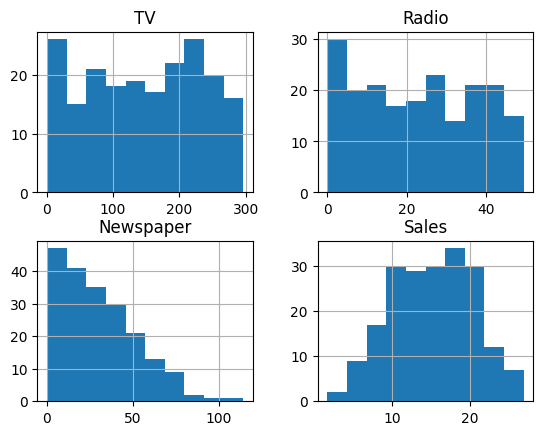

In [11]:
df.hist()
pyplot.show()

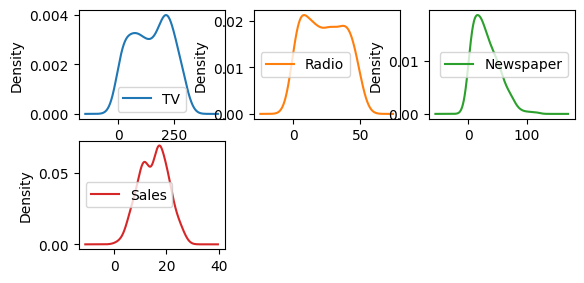

In [12]:
df.plot(kind="density", subplots=True, layout=(3, 3), sharex=False)
pyplot.show()

# Splitting of Data

In [13]:
X = df.iloc[:, 0:1].values
y = df.iloc[:, 1].values

In [14]:
print(X)

[[230.1]
 [ 44.5]
 [ 17.2]
 [151.5]
 [180.8]
 [  8.7]
 [ 57.5]
 [120.2]
 [  8.6]
 [199.8]
 [ 66.1]
 [214.7]
 [ 23.8]
 [ 97.5]
 [204.1]
 [195.4]
 [ 67.8]
 [281.4]
 [ 69.2]
 [147.3]
 [218.4]
 [237.4]
 [ 13.2]
 [228.3]
 [ 62.3]
 [262.9]
 [142.9]
 [240.1]
 [248.8]
 [ 70.6]
 [292.9]
 [112.9]
 [ 97.2]
 [265.6]
 [ 95.7]
 [290.7]
 [266.9]
 [ 74.7]
 [ 43.1]
 [228. ]
 [202.5]
 [177. ]
 [293.6]
 [206.9]
 [ 25.1]
 [175.1]
 [ 89.7]
 [239.9]
 [227.2]
 [ 66.9]
 [199.8]
 [100.4]
 [216.4]
 [182.6]
 [262.7]
 [198.9]
 [  7.3]
 [136.2]
 [210.8]
 [210.7]
 [ 53.5]
 [261.3]
 [239.3]
 [102.7]
 [131.1]
 [ 69. ]
 [ 31.5]
 [139.3]
 [237.4]
 [216.8]
 [199.1]
 [109.8]
 [ 26.8]
 [129.4]
 [213.4]
 [ 16.9]
 [ 27.5]
 [120.5]
 [  5.4]
 [116. ]
 [ 76.4]
 [239.8]
 [ 75.3]
 [ 68.4]
 [213.5]
 [193.2]
 [ 76.3]
 [110.7]
 [ 88.3]
 [109.8]
 [134.3]
 [ 28.6]
 [217.7]
 [250.9]
 [107.4]
 [163.3]
 [197.6]
 [184.9]
 [289.7]
 [135.2]
 [222.4]
 [296.4]
 [280.2]
 [187.9]
 [238.2]
 [137.9]
 [ 25. ]
 [ 90.4]
 [ 13.1]
 [255.4]
 [225.8]
 

In [15]:
print(y)

[37.8 39.3 45.9 41.3 10.8 48.9 32.8 19.6  2.1  2.6  5.8 24.  35.1  7.6
 32.9 47.7 36.6 39.6 20.5 23.9 27.7  5.1 15.9 16.9 12.6  3.5 29.3 16.7
 27.1 16.  28.3 17.4  1.5 20.   1.4  4.1 43.8 49.4 26.7 37.7 22.3 33.4
 27.7  8.4 25.7 22.5  9.9 41.5 15.8 11.7  3.1  9.6 41.7 46.2 28.8 49.4
 28.1 19.2 49.6 29.5  2.  42.7 15.5 29.6 42.8  9.3 24.6 14.5 27.5 43.9
 30.6 14.3 33.   5.7 24.6 43.7  1.6 28.5 29.9  7.7 26.7  4.1 20.3 44.5
 43.  18.4 27.5 40.6 25.5 47.8  4.9  1.5 33.5 36.5 14.  31.6  3.5 21.
 42.3 41.7  4.3 36.3 10.1 17.2 34.3 46.4 11.   0.3  0.4 26.9  8.2 38.
 15.4 20.6 46.8 35.  14.3  0.8 36.9 16.  26.8 21.7  2.4 34.6 32.3 11.8
 38.9  0.  49.  12.  39.6  2.9 27.2 33.5 38.6 47.  39.  28.9 25.9 43.9
 17.  35.4 33.2  5.7 14.8  1.9  7.3 49.  40.3 25.8 13.9  8.4 23.3 39.7
 21.1 11.6 43.5  1.3 36.9 18.4 18.1 35.8 18.1 36.8 14.7  3.4 37.6  5.2
 23.6 10.6 11.6 20.9 20.1  7.1  3.4 48.9 30.2  7.8  2.3 10.   2.6  5.4
  5.7 43.  21.3 45.1  2.1 28.7 13.9 12.1 41.1 10.8  4.1 42.  35.6  3.7
  4.9  9

# Imputation

In [16]:
imputer = SimpleImputer(
    missing_values=np.NAN, strategy="mean", fill_value=None, copy=True
)
imputer = imputer.fit(X[:, 0:1])
X[:, 0:1] = imputer.transform(X[:, 0:1])

In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=1 / 3, random_state=0
)

# Linear Regression Model

In [18]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [19]:
y_pred = regressor.predict(X_test)
print(y_pred)

[22.47835127 22.2375912  22.74419052 25.24333019 23.74484955 22.31533664
 21.71970626 24.62136668 21.90905403 24.08843423 24.88720592 22.70406384
 23.57431117 23.96554628 22.5686363  23.11787021 24.94112615 21.61938957
 22.547319   24.28655971 25.21699706 23.3699159  23.80629353 23.26207546
 22.28147976 23.15423501 23.68716745 24.18122718 24.41947933 21.92535549
 22.46079585 24.1047357  25.13047391 24.64143002 21.77613441 21.84510213
 22.35797124 23.87776917 22.4683196  21.92410153 22.07332262 22.00560885
 23.40251883 24.23890928 24.31163888 22.89842744 21.71845231 21.82253088
 23.18683793 22.92225265 22.9874585  24.48844706 24.79315902 23.92918148
 22.17113139 22.39182812 25.28345687 23.7736906  24.14987821 21.70215084
 24.93611031 24.08843423 24.3505116  23.45769301 23.7586431  24.34047993
 24.90476134]


# Plotting

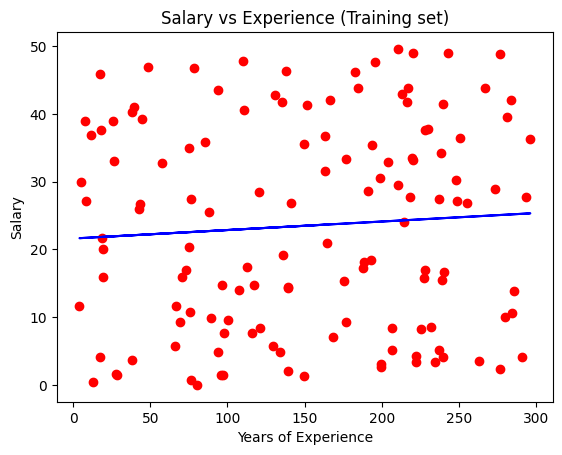

In [20]:
plt.scatter(X_train, y_train, color="red")
plt.plot(X_train, regressor.predict(X_train), color="blue")
plt.title("Salary vs Experience (Training set)")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()

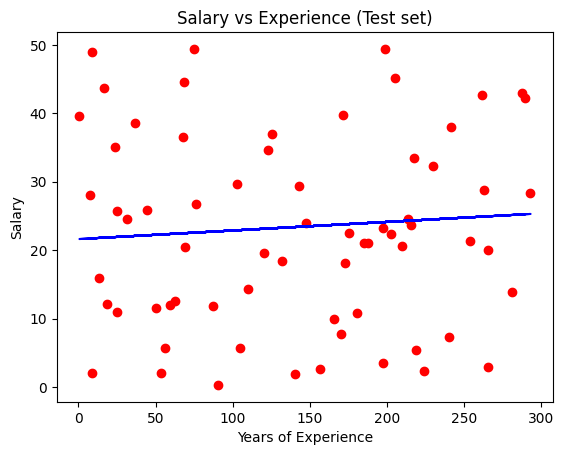

In [21]:
plt.scatter(X_test, y_test, color="red")
plt.plot(X_test, regressor.predict(X_test), color="blue")
plt.title("Salary vs Experience (Test set)")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()

In [22]:
print("Regressor slope:  %.2f  " % (regressor.coef_[0]))
print("Regressor intercept:%.2f  " % regressor.intercept_)

Regressor slope:  0.01  
Regressor intercept:21.61  


# Prediction

In [23]:
YearsExperience = 6
salary_prediction = regressor.predict([[YearsExperience]])[0]
print("Salary for given Years of Experience is : %.2f" % salary_prediction)

Salary for given Years of Experience is : 21.69


# Regression Errors

In [24]:
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = metrics.r2_score(y_test, y_pred)

In [25]:
print("Mean Absolute Error (MAE): %.2f" % mae)
print("Mean Squared Error (MSE): %.2f" % mse)
print("Root Mean Squared Error (RMSE): %.2f" % rmse)
print("R^2 Score: %.2f" % r2)

Mean Absolute Error (MAE): 11.64
Mean Squared Error (MSE): 193.42
Root Mean Squared Error (RMSE): 13.91
R^2 Score: -0.00


In [26]:
print("Train Score: %f" % (regressor.score(X_train, y_train)))
print("Test Score: %f" % (regressor.score(X_test, y_test)))

Train Score: 0.004825
Test Score: -0.004713
